# Stock analysis

## Import

Libraries

In [1]:
from utils.init import *

from utils.analyse_price import *
from utils.analyse_fundamentals import *
from utils.data import *
from utils.params import *
from utils.pdf import *

In [2]:
TICKER = 'TYR'
COUNTRY = 'AU'
first_end_of_quarter = '2020-06'
last_end_of_quarter = '2024-06'
historical_prices_dict = {}

## Get data

Run data

355 Technology SoftwareInfrastructure


,ASX code,Market Cap,weight
1660,SQ2,5.372542e+10,0.298561
1905,WTC,4.501768e+10,0.250170
1921,XRO,2.229705e+10,0.123908
1287,NXT,1.117385e+10,0.062095
1764,TNE,7.943218e+09,0.044142
1278,NWL,6.083539e+09,0.033807
8,360,4.290119e+09,0.023841
399,CDA,2.874022e+09,0.015971
1450,PXA,2.565842e+09,0.014259
1284,NXL,2.099967e+09,0.011670


,ASX code,Market Cap ($bn)
1800,TYR,0.47


0.0


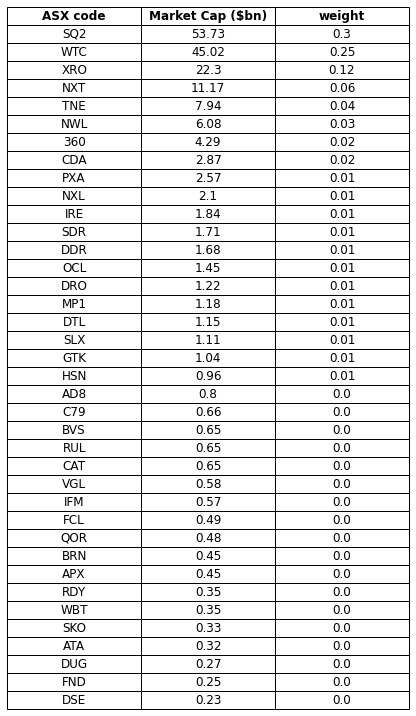

$DUG.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$C79.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$ATA.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$DSE.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$C79.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")
$ATA.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")
$PXA.AX: p

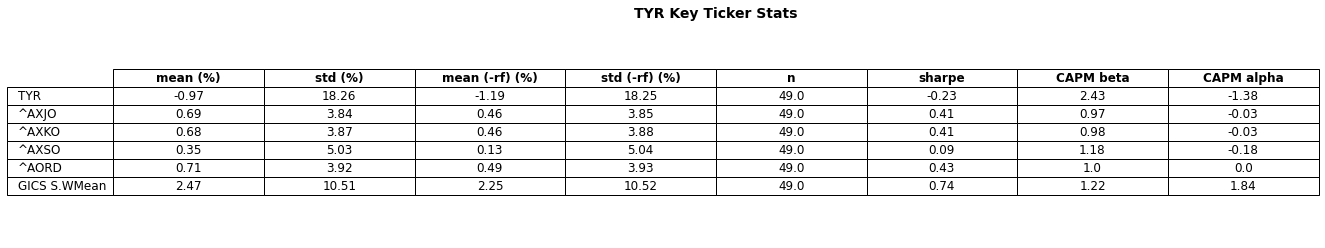

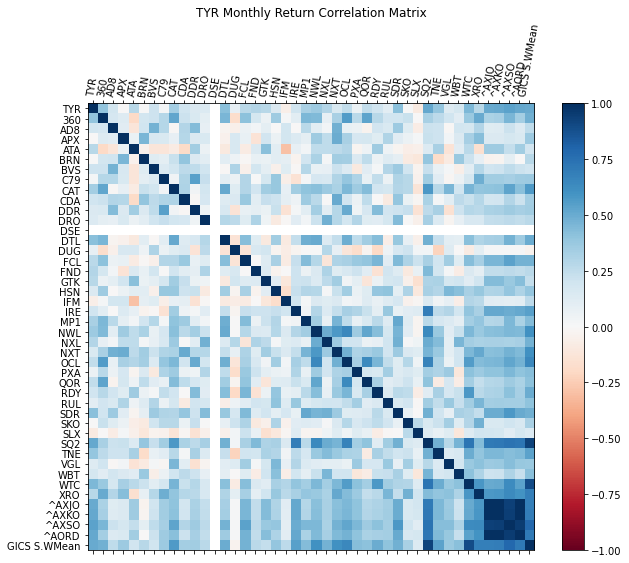

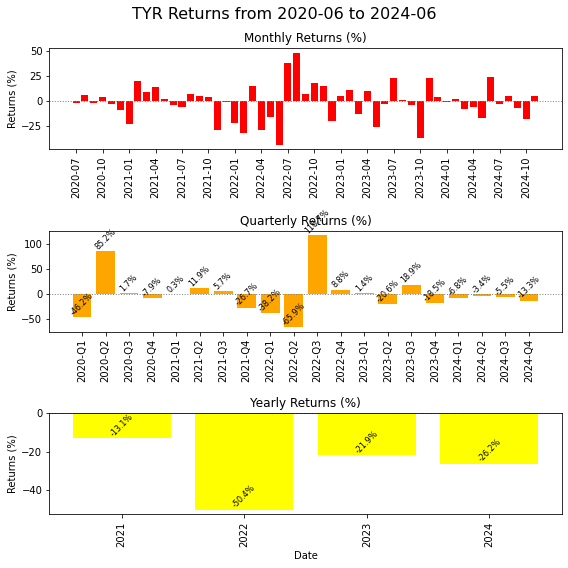

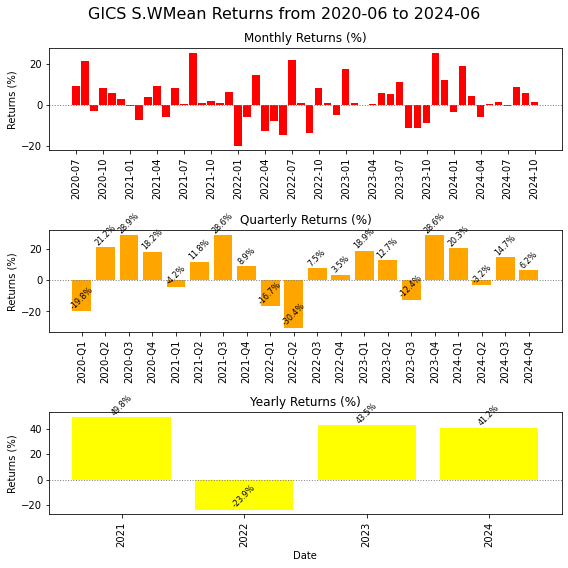

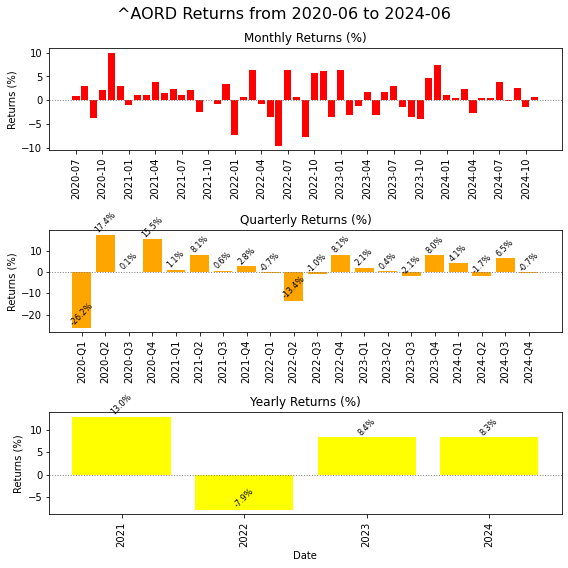

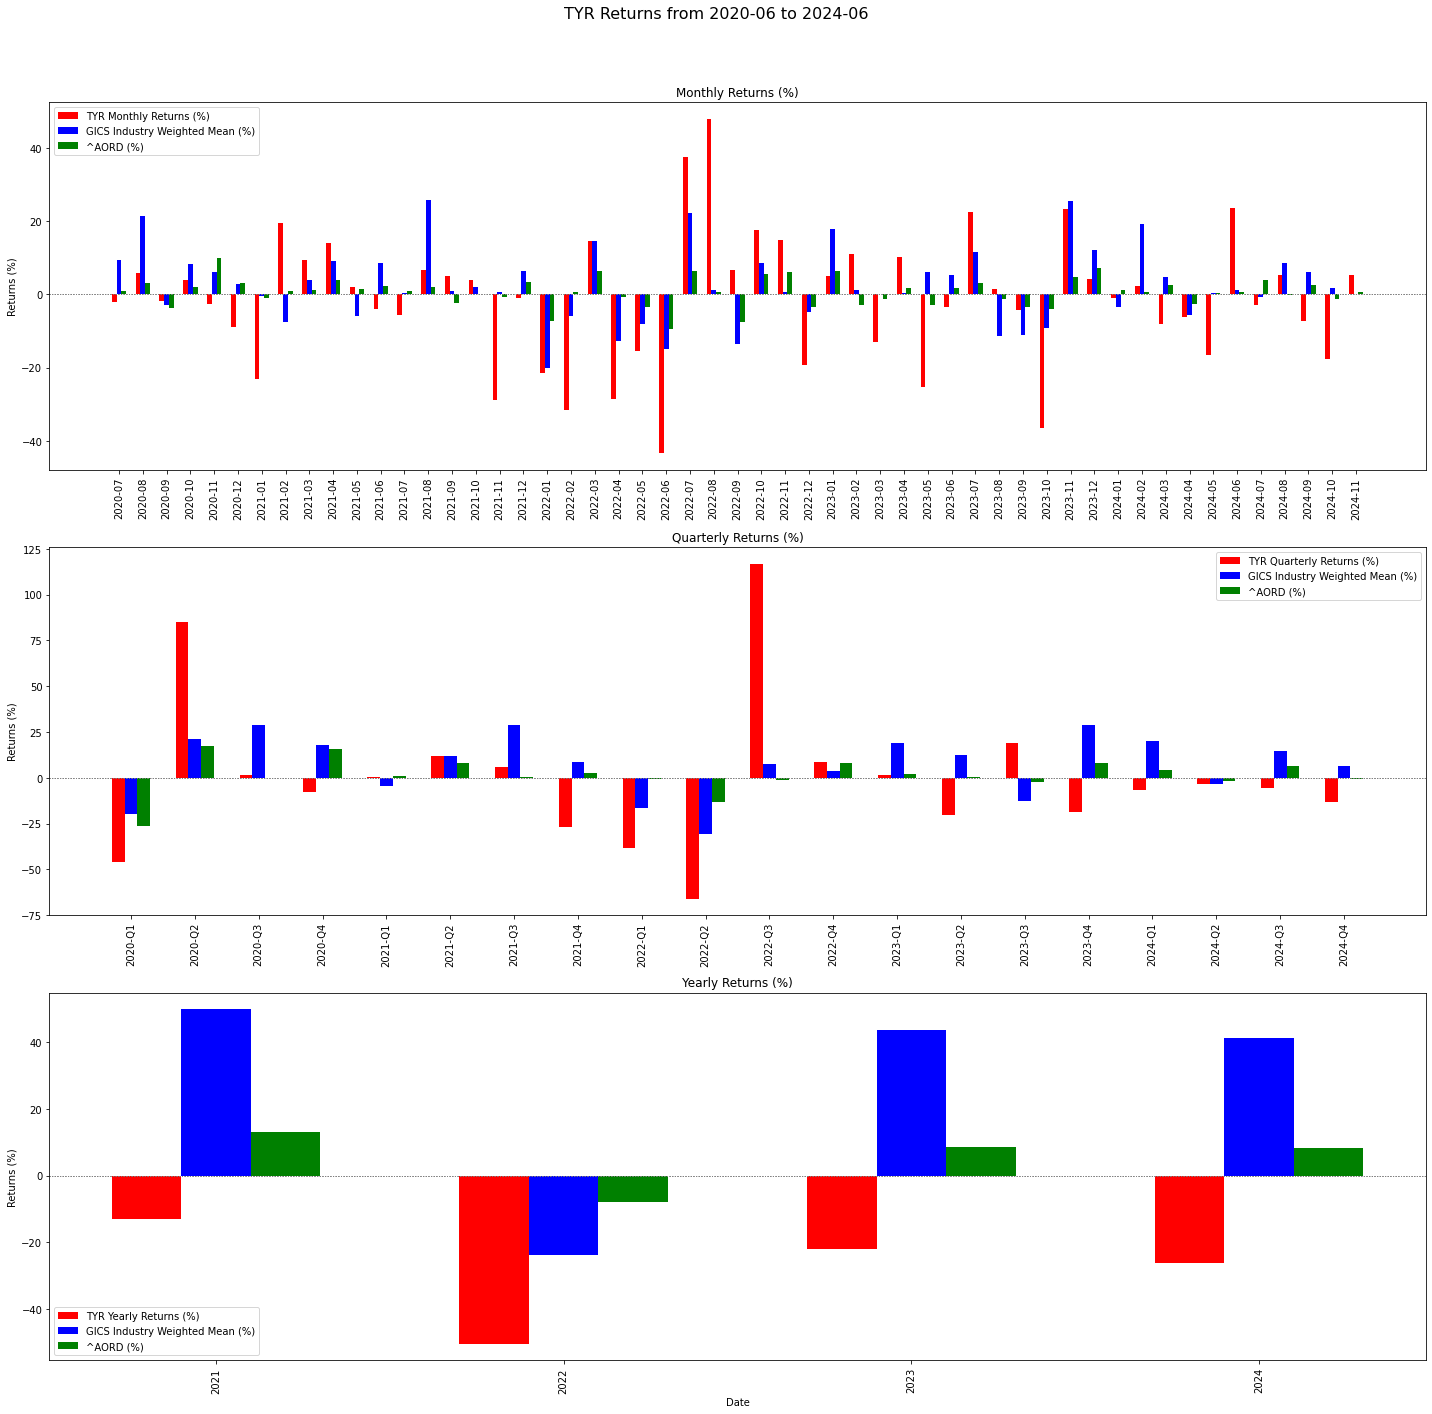

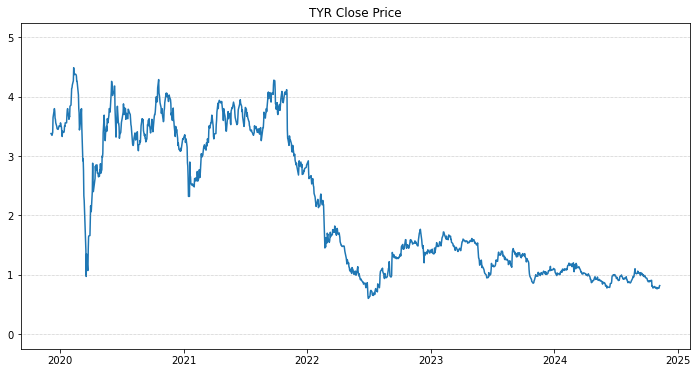

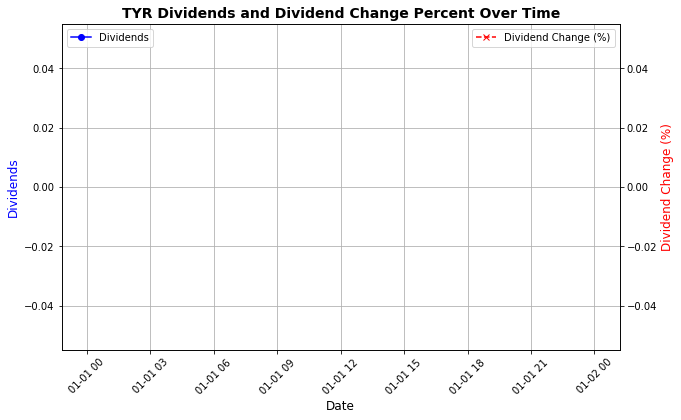

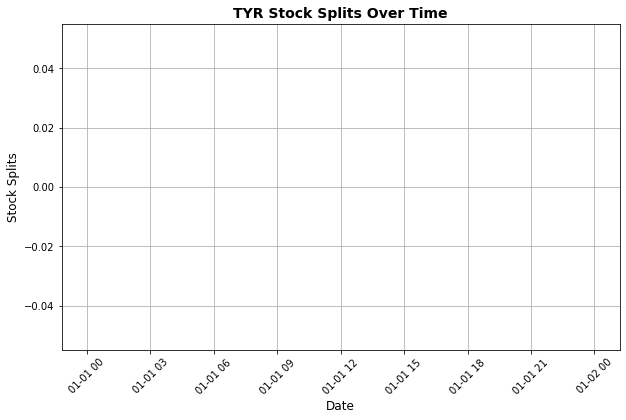

In [3]:
# read in data
index_tickers_list = get_index_tickers_list(COUNTRY)
interest_rate_df_dict = get_interest_rate(COUNTRY)

comparable_tickers = {'type': {}, 'list': []}
if COUNTRY == 'AU':
    asx_companies_directory_df = get_asx_companies_directory()
    asx_gics_df = get_asx_gics()

    # get same gics tickers
    market_value_rank = get_market_value_rank(
        TICKER, asx_gics_df)
    AU_top_list_dict = get_top_ASX_companies_list(asx_companies_directory_df)
    ASX_ticker_gics_dict = get_ASX_ticker_gics(TICKER, asx_gics_df)
    same_gics_ASX_tickers_dict = get_same_gics_ASX_tickers(asx_gics_df,
                                                           ASX_ticker_gics_dict, AU_top_list_dict)
    comparable_ASX_tickers_dict = get_comparable_ASX_tickers(
        TICKER, same_gics_ASX_tickers_dict)

    print(market_value_rank,
          ASX_ticker_gics_dict['Sector'], ASX_ticker_gics_dict['Industry'])

    same_industry_ASX_tickers_mcap_df = get_same_gics_ASX_MCap_weights(TICKER,
                                                                       asx_companies_directory_df, comparable_ASX_tickers_dict)

    # market value and weight
    same_industry_tickers_mcap_df = get_same_industry_tickers_mcap(
        same_industry_ASX_tickers_mcap_df)
    display(same_industry_tickers_mcap_df)

    ticker_mv_df = get_AU_ticker_mv_df(asx_companies_directory_df, TICKER)
    display(ticker_mv_df)

    ticker_proportion_of_market = get_AU_ticker_proportion_of_market(
        ticker_mv_df, same_industry_tickers_mcap_df)
    print(round(ticker_proportion_of_market, 2))

    plot_gics_mcap_weights(TICKER, same_industry_tickers_mcap_df)

    same_gics_industry_weight_dict = get_same_AU_gics_industry_weight_dict(
        same_industry_tickers_mcap_df)

# get historic prices
analysis_needed_ticker_list = get_analysis_needed_ticker_list(
    TICKER, index_tickers_list, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
historical_prices_dict = get_historical_prices_for_interested_list(
    analysis_needed_ticker_list, index_tickers_list, historical_prices_dict, COUNTRY)

# get historical returns
monthly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    monthly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['monthly'], 'M')

quarterly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    quarterly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['quarterly'], 'Q')

yearly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    yearly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['annualy'], 'Y')

# get GICS industry weighted returns
monthly_returns_df_dict = get_gics_industry_weighted_mean(
    monthly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'M', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
quarterly_returns_df_dict = get_gics_industry_weighted_mean(
    quarterly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'Q', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
yearly_returns_df_dict = get_gics_industry_weighted_mean(
    yearly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'Y', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)

# get stats based on returns
stats_df = get_monthly_stats_for_all_tickers(
    monthly_returns_df_dict, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, index_tickers_list, same_industry_ASX_tickers_mcap_df if TICKER == 'AU' else None, TICKER, first_end_of_quarter, last_end_of_quarter, COUNTRY)
plot_key_ticker_stats_table(
    stats_df, TICKER, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, index_tickers_list)

# correlation chart
correlation_df, period_of_interest_return_df = historical_corr(
    monthly_returns_df_dict, first_end_of_quarter, last_end_of_quarter)
plot_correlation(correlation_df, ticker=TICKER)

# plot returns
# interested ticker
plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': TICKER,
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

if COUNTRY == 'AU' and len(comparable_ASX_tickers_dict['list']) > 0:
    plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                    'quarterly_returns_df_dict': quarterly_returns_df_dict,
                    'yearly_returns_df_dict': yearly_returns_df_dict,
                    'ticker': 'GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else 'GICS S.WMean',
                    'first_end_of_quarter': first_end_of_quarter,
                    'last_end_of_quarter': last_end_of_quarter,
                    'underlying_ticker': TICKER})

plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': '^AORD' if COUNTRY == 'AU' else '^GSPC',
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

plot_returns_comparative(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                            'quarterly_returns_df_dict': quarterly_returns_df_dict,
                            'yearly_returns_df_dict': yearly_returns_df_dict, 'TICKER': TICKER,
                            'first_end_of_quarter': first_end_of_quarter,
                            'last_end_of_quarter': last_end_of_quarter,
                            'comparable_tickers': comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, 'country': COUNTRY}
                         )

# price movement
plot_close_price_with_dollar_lines(TICKER, historical_prices_dict)

# dividends
historical_dividends = get_historical_dividends(
    TICKER, historical_prices_dict, COUNTRY)
plot_dividends(TICKER, historical_dividends, historical_prices_dict, COUNTRY)

# historical splits
historical_splits = get_historical_splits(
    TICKER, historical_prices_dict, COUNTRY)
plot_splits_over_time(TICKER, historical_prices_dict, COUNTRY)

# Fundamentals

Missing column from cashflow table for ticker TYR: 'Income Tax Paid Supplemental Data'
Missing data for financials table for ticker TYR: 'Total Expenses'


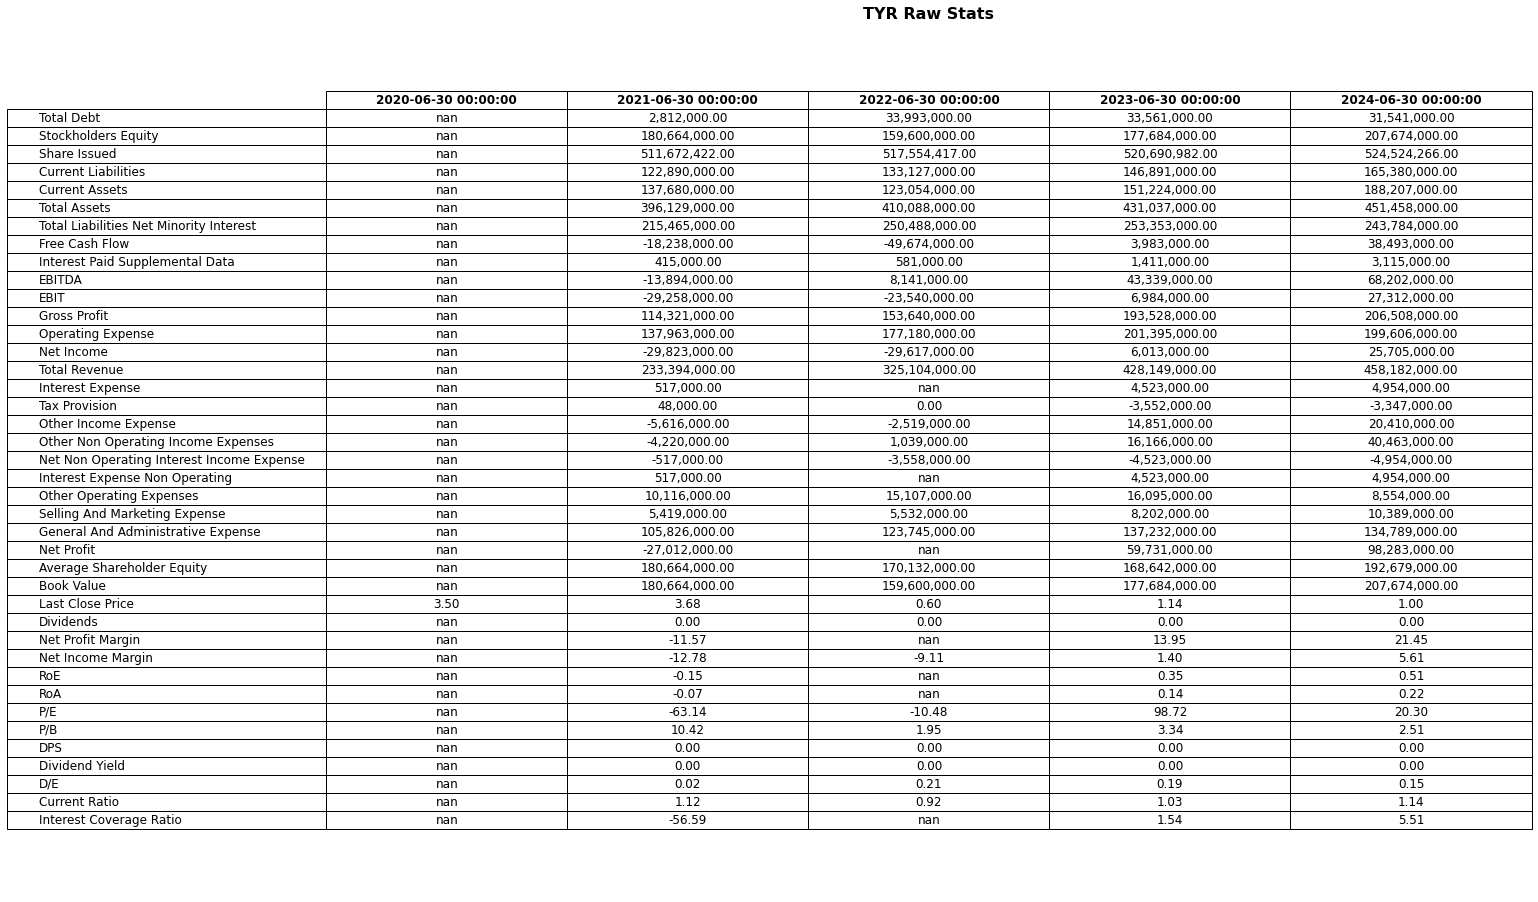

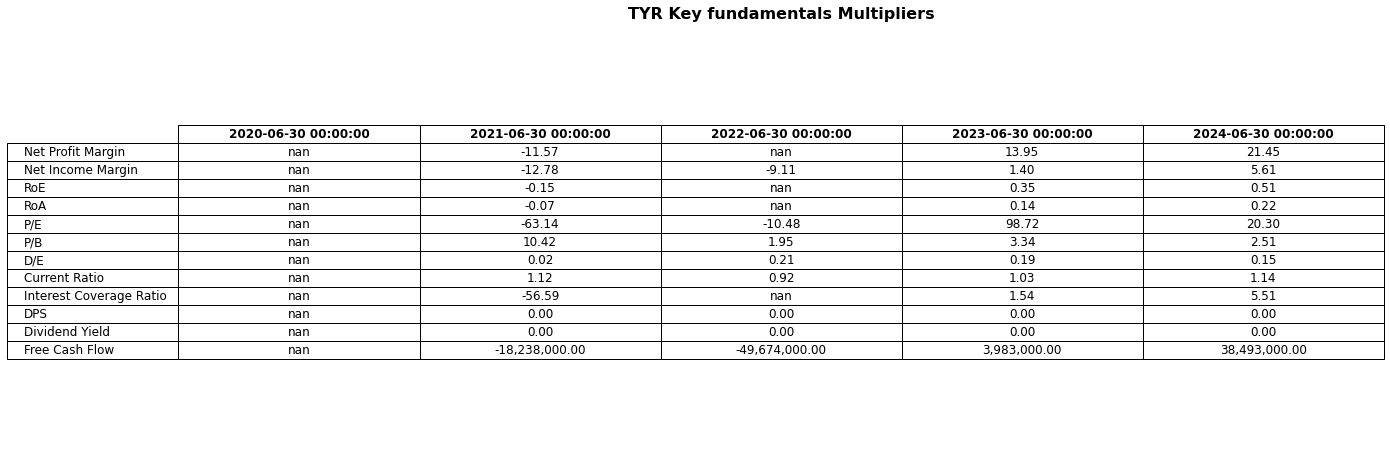

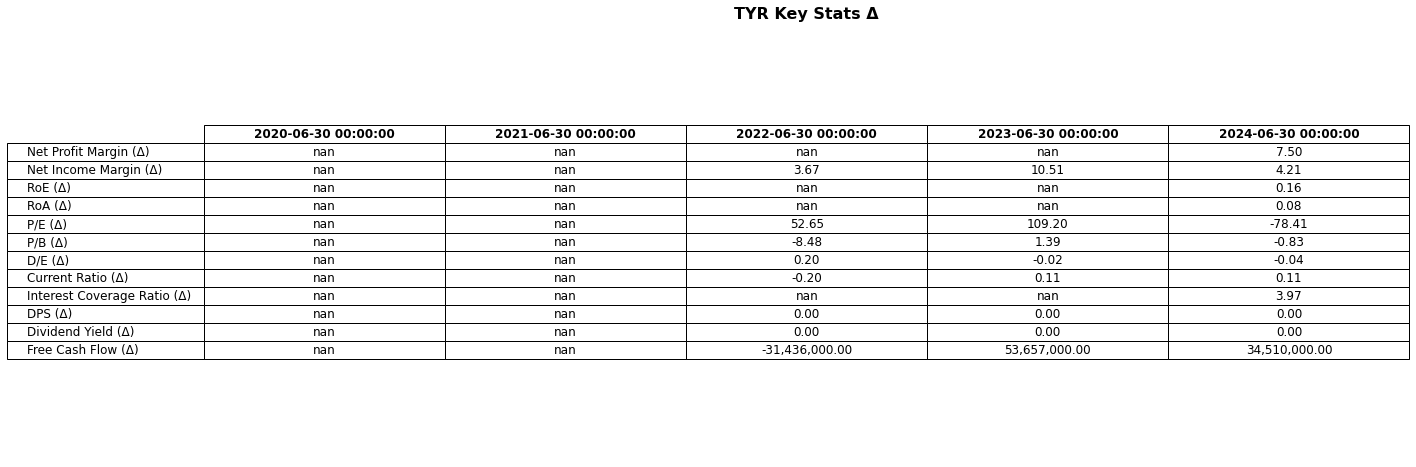


 360

 AD8
Missing data for financials table for ticker AD8: 'Total Expenses'
Missing data for financials table for ticker AD8: 'Other Operating Expenses'

 APX
Missing data for financials table for ticker APX: 'Total Expenses'
Missing data for financials table for ticker APX: 'Selling And Marketing Expense'

 ATA
Missing data for financials table for ticker ATA: 'Total Expenses'
Missing data for financials table for ticker ATA: 'Other Operating Expenses'

 BRN
Missing data for financials table for ticker BRN: 'Total Expenses'

 BVS
Missing column from cashflow table for ticker BVS: 'Interest Paid Supplemental Data'
Missing data for financials table for ticker BVS: 'Total Expenses'
Missing data for financials table for ticker BVS: 'Selling And Marketing Expense'

 C79
Missing column from cashflow table for ticker C79: 'Income Tax Paid Supplemental Data'
Missing data for financials table for ticker C79: 'Total Expenses'

 CAT
Missing column from cashflow table for ticker CAT: 'Interest

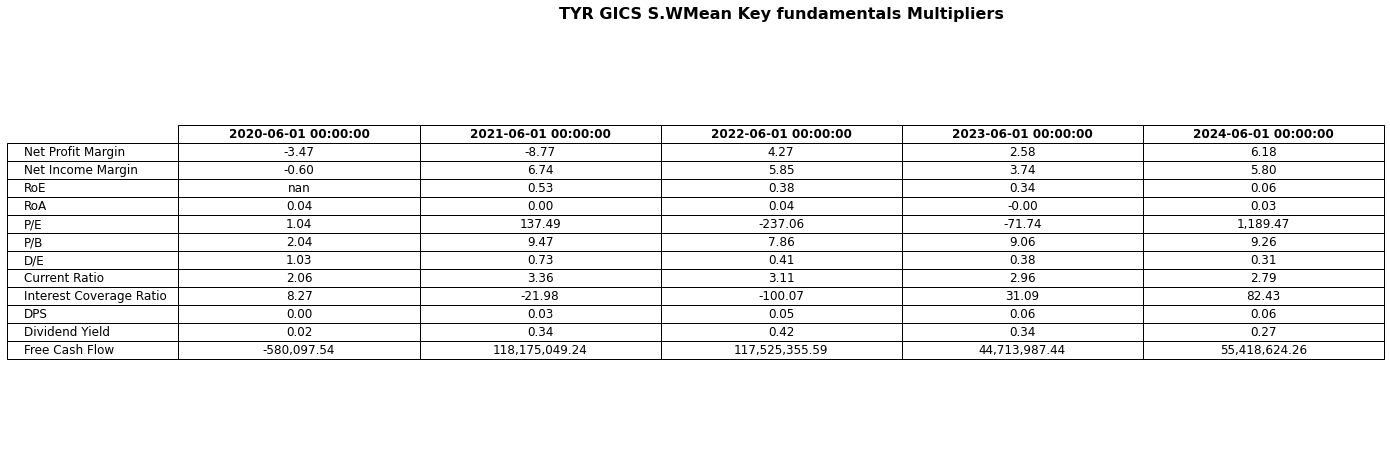

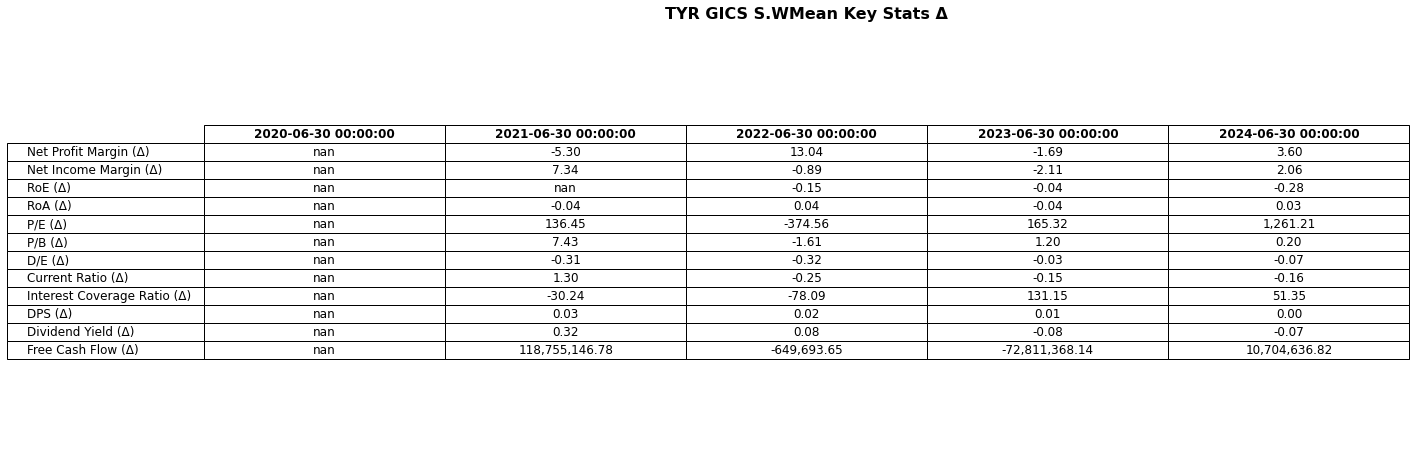

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


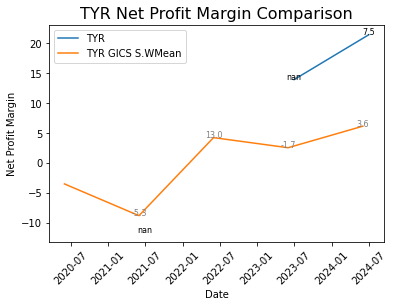

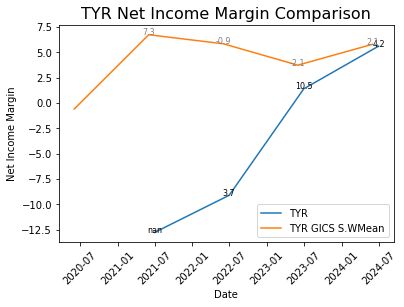

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


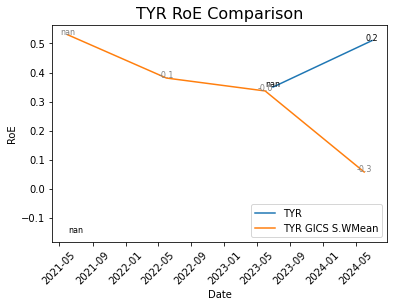

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


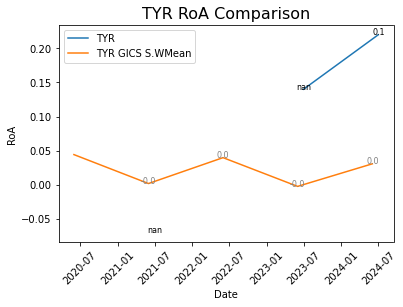

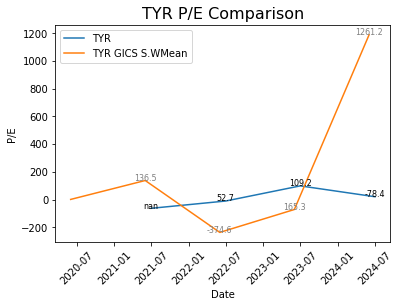

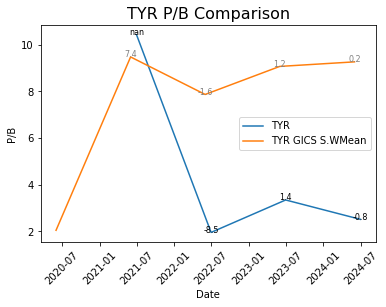

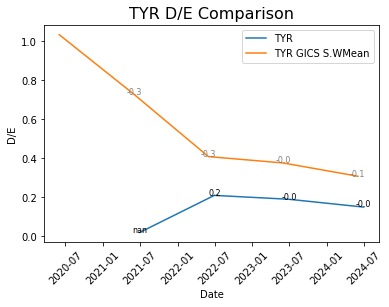

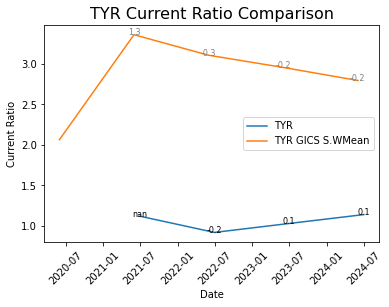

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


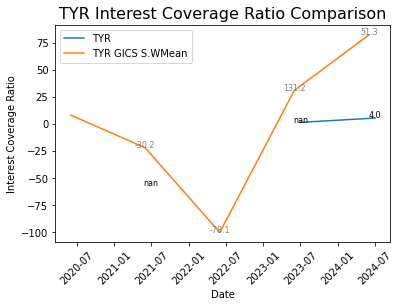

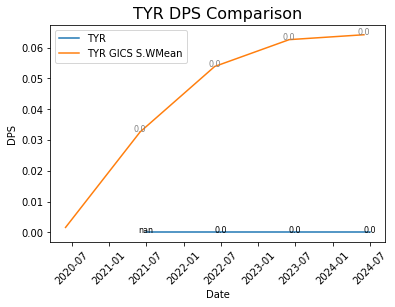

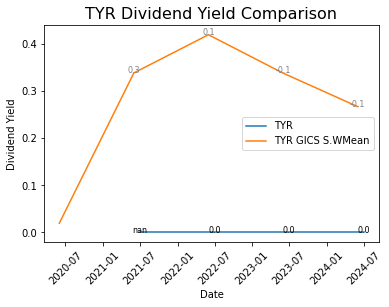

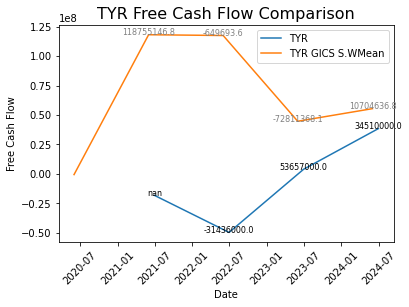

In [4]:
got_fundamentals = False

if not (COUNTRY == 'AU' and ASX_ticker_gics_dict['Sector'] == 'Unknown' and ASX_ticker_gics_dict['Industry'] == 'Unknown'):

    got_fundamentals = True

    # get fundamentals for ticker of interest
    interested_ticker_raw_fundamentals_stats, \
        interested_ticker_key_interested_fundamentals_stats, \
        interested_ticker_key_interested_fundamentals_stats_diff, \
        object = get_fundamentals_dfs(
            first_end_of_quarter, historical_prices_dict,
            TICKER, COUNTRY)
    # create tables for fundamentals for ticker of interest
    plot_raw_fundamentals_stats_table(
        interested_ticker_raw_fundamentals_stats, TICKER)
    plot_key_fundamentals_multipliers_table(
        interested_ticker_key_interested_fundamentals_stats, TICKER)
    plot_key_fundamentals_multipliers_diff_table(
        interested_ticker_key_interested_fundamentals_stats_diff, TICKER)

    # get fundamentals for comparable tickers
    if COUNTRY == 'AU':

        # get raw fundamentals stats for comparable tickers
        raw_fundamentals_stats_dict, key_interested_stats_dict, object_dict = get_raw_fundamentals_stats(
            comparable_ASX_tickers_dict, first_end_of_quarter, historical_prices_dict, COUNTRY)

        # aggregate and integrate the fundamentals stats for comparable tickers
        agg_interpolated_fundamentals_stats_df_dict = get_agg_interpolated_fundamentals_stats(
            raw_fundamentals_stats_dict, interested_ticker_key_interested_fundamentals_stats_diff)

        # get key interested fundamental stats from the interpolated fundamentals for comparable tickers
        key_interested_fundamentals_stats_dict, key_interested_fundamentals_stats_diff_dict = get_key_interested_fundamentals_stats_for_comparable(
            agg_interpolated_fundamentals_stats_df_dict, object_dict, first_end_of_quarter, historical_prices_dict)

        # get weighted average of the key interested fundamentals stats for the GICS industry
        weighted_GICS_key_interested_fundamentals_stats = get_weighted_fundamentals(
            key_interested_fundamentals_stats_dict, same_gics_industry_weight_dict)
        weighted_GICS_key_interested_fundamentals_stats.index = weighted_GICS_key_interested_fundamentals_stats.index

        plot_key_fundamentals_multipliers_table(
            weighted_GICS_key_interested_fundamentals_stats.astype(float).round(2),  f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

        # get percentage change for key interested fundamental stats for the weighted average of the GICS industry
        weighted_GICS_key_interested_fundamentals_stats_diff = get_key_interested_fundamentals_stat_diff(
            weighted_GICS_key_interested_fundamentals_stats)
        weighted_GICS_key_interested_fundamentals_stats_diff.index = interested_ticker_key_interested_fundamentals_stats_diff.index

        plot_key_fundamentals_multipliers_diff_table(
            weighted_GICS_key_interested_fundamentals_stats_diff, f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

    else:
        weighted_GICS_key_interested_fundamentals_stats = pd.DataFrame()

    # plot the comparison of key interested fundamentals for the ticker of interest and the weighted average of the GICS industry
    plot_key_fundamentals_multipliers(
        interested_ticker_key_interested_fundamentals_stats, weighted_GICS_key_interested_fundamentals_stats, TICKER, {})

PDF

In [5]:
create_pdf(**{
    'ASX_ticker_gics_dict': ASX_ticker_gics_dict,
    'comparable_ASX_tickers_dict': comparable_ASX_tickers_dict,
    'ticker_mv_df': ticker_mv_df,
    'same_industry_tickers_mcap_df': same_industry_tickers_mcap_df,
    'got_fundamentals': got_fundamentals,
    'TICKER': TICKER,
    'COUNTRY': COUNTRY,
    'market_value_rank': market_value_rank
})